In [1]:
%matplotlib inline
from pathlib import Path
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, roc_curve, auc
import matplotlib.pylab as plt
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTENC
from dmba import regressionSummary, classificationSummary
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
 

import matplotlib.pylab as plt

In [2]:
predic_df = pd.read_csv('Base_Proyecto.csv',encoding="ISO-8859-1")
predic_df

,Hypertension,Heart Disease,Married,Work,Residence,Avg_glucose_level,Bmi,Smoking,Gender,Age,Stroke
0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,Male,67.0,1
1,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,Female,61.0,1
2,0,1,Yes,Private,Rural,105.92,32.5,never smoked,Male,80.0,1
3,0,0,Yes,Private,Urban,171.23,34.4,smokes,Female,49.0,1
4,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,Female,79.0,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,1,0,Yes,Private,Urban,83.75,NaN,never smoked,Female,80.0,0
5106,0,0,Yes,dsfsdf,Urban,125.20,40.0,never smoked,Female,81.0,0
5107,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,Female,35.0,0
5108,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,Male,51.0,0


# 1. PREPROCESAMIENTO DE DATOS EDA

Descripción tamaño base

In [3]:
predic_df.shape


(5110, 11)

Nombres de Columnas

In [4]:
#nombres de columnas
predic_df.columns

Index(['Hypertension', 'Heart Disease', 'Married', 'Work', 'Residence',
       'Avg_glucose_level', 'Bmi', 'Smoking', 'Gender', 'Age', 'Stroke'],
      dtype='object')

In [5]:
predic_df['Work'].unique()

array(['Private', 'Self-employed', 'k\x96sdh-k', 'Govt_job', 'sdsd-i',
       'children', 'Never_worked', 'dsfsdf', 'sdfsdf'], dtype=object)

In [6]:
predic_df.groupby(['Work']).count()

,Hypertension,Heart Disease,Married,Residence,Avg_glucose_level,Bmi,Smoking,Gender,Age,Stroke
Work,,,,,,,,,,
Govt_job,657,657,657,657,657,630,657,657,657,657
Never_worked,22,22,22,22,22,22,22,22,22,22
Private,2919,2919,2919,2919,2919,2806,2919,2919,2919,2919
Self-employed,818,818,818,818,818,774,818,818,818,818
children,687,687,687,687,687,671,687,687,687,687
dsfsdf,2,2,2,2,2,2,2,2,2,2
ksdh-k,1,1,1,1,1,0,1,1,1,1
sdfsdf,3,3,3,3,3,3,3,3,3,3
sdsd-i,1,1,1,1,1,1,1,1,1,1


In [7]:
predic_df["Work"].replace(["dsfsdf","sdsd-i","sdfsdf","k\x96sdh-k"],"Private", inplace=True)
predic_df

,Hypertension,Heart Disease,Married,Work,Residence,Avg_glucose_level,Bmi,Smoking,Gender,Age,Stroke
0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,Male,67.0,1
1,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,Female,61.0,1
2,0,1,Yes,Private,Rural,105.92,32.5,never smoked,Male,80.0,1
3,0,0,Yes,Private,Urban,171.23,34.4,smokes,Female,49.0,1
4,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,Female,79.0,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,1,0,Yes,Private,Urban,83.75,NaN,never smoked,Female,80.0,0
5106,0,0,Yes,Private,Urban,125.20,40.0,never smoked,Female,81.0,0
5107,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,Female,35.0,0
5108,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,Male,51.0,0


In [8]:
predic_df.groupby(['Work']).count()

,Hypertension,Heart Disease,Married,Residence,Avg_glucose_level,Bmi,Smoking,Gender,Age,Stroke
Work,,,,,,,,,,
Govt_job,657,657,657,657,657,630,657,657,657,657
Never_worked,22,22,22,22,22,22,22,22,22,22
Private,2926,2926,2926,2926,2926,2812,2926,2926,2926,2926
Self-employed,818,818,818,818,818,774,818,818,818,818
children,687,687,687,687,687,671,687,687,687,687


Tipo de Datos

In [9]:
# Muestra informacion relevante del df importado sobre todo el tipo de datos,los nulos, el numero de registros, entre otros
predic_df['Bmi'] = pd.Series([round(val,2) for val in predic_df['Bmi']])
predic_df['Bmi']
print(predic_df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Hypertension       5110 non-null   int64  
 1   Heart Disease      5110 non-null   int64  
 2   Married            5110 non-null   object 
 3   Work               5110 non-null   object 
 4   Residence          5110 non-null   object 
 5   Avg_glucose_level  5110 non-null   float64
 6   Bmi                4909 non-null   float64
 7   Smoking            5110 non-null   object 
 8   Gender             5110 non-null   object 
 9   Age                5110 non-null   float64
 10  Stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB
None


In [10]:
predic_df.describe()

,Hypertension,Heart Disease,Avg_glucose_level,Bmi,Age,Stroke
count,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000,5110.000000
mean,0.097456,0.054012,106.147677,61.463720,43.226614,0.048728
std,0.296607,0.226063,45.283560,1140.662468,22.612647,0.215320
min,0.000000,0.000000,55.120000,10.300000,0.080000,0.000000
25%,0.000000,0.000000,77.245000,23.500000,25.000000,0.000000
50%,0.000000,0.000000,91.885000,28.100000,45.000000,0.000000
75%,0.000000,0.000000,114.090000,33.100000,61.000000,0.000000
max,1.000000,1.000000,271.740000,40000.000000,82.000000,1.000000


Análisis de Base, valores nulos/blancos y valores atípicos

Valores Nulos/Blancos

In [11]:
predic_df.isna().sum()

Hypertension           0
Heart Disease          0
Married                0
Work                   0
Residence              0
Avg_glucose_level      0
Bmi                  201
Smoking                0
Gender                 0
Age                    0
Stroke                 0
dtype: int64

In [12]:
predic_df['Bmi'].fillna(predic_df['Bmi'].mean(), inplace = True)

In [13]:
predic_df.isna().sum()

Hypertension         0
Heart Disease        0
Married              0
Work                 0
Residence            0
Avg_glucose_level    0
Bmi                  0
Smoking              0
Gender               0
Age                  0
Stroke               0
dtype: int64

In [14]:
predic_df['Bmi'] = pd.Series([round(val,2) for val in predic_df['Bmi']])
predic_df

,Hypertension,Heart Disease,Married,Work,Residence,Avg_glucose_level,Bmi,Smoking,Gender,Age,Stroke
0,0,1,Yes,Private,Urban,228.69,36.60,formerly smoked,Male,67.0,1
1,0,0,Yes,Self-employed,Rural,202.21,61.46,never smoked,Female,61.0,1
2,0,1,Yes,Private,Rural,105.92,32.50,never smoked,Male,80.0,1
3,0,0,Yes,Private,Urban,171.23,34.40,smokes,Female,49.0,1
4,1,0,Yes,Self-employed,Rural,174.12,24.00,never smoked,Female,79.0,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,1,0,Yes,Private,Urban,83.75,61.46,never smoked,Female,80.0,0
5106,0,0,Yes,Private,Urban,125.20,40.00,never smoked,Female,81.0,0
5107,0,0,Yes,Self-employed,Rural,82.99,30.60,never smoked,Female,35.0,0
5108,0,0,Yes,Private,Rural,166.29,25.60,formerly smoked,Male,51.0,0


In [15]:
predic_df.describe()

,Hypertension,Heart Disease,Avg_glucose_level,Bmi,Age,Stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,0.097456,0.054012,106.147677,61.463573,43.226614,0.048728
std,0.296607,0.226063,45.283560,1117.999161,22.612647,0.215320
min,0.000000,0.000000,55.120000,10.300000,0.080000,0.000000
25%,0.000000,0.000000,77.245000,23.800000,25.000000,0.000000
50%,0.000000,0.000000,91.885000,28.400000,45.000000,0.000000
75%,0.000000,0.000000,114.090000,34.000000,61.000000,0.000000
max,1.000000,1.000000,271.740000,40000.000000,82.000000,1.000000


In [16]:
predic_df.max()

Hypertension                1
Heart Disease               1
Married                   Yes
Work                 children
Residence               Urban
Avg_glucose_level      271.74
Bmi                     40000
Smoking                smokes
Gender                  Other
Age                        82
Stroke                      1
dtype: object

In [17]:
predic_df["Bmi"].replace([40000.0, 40000.0, 40000.0,40000.0],61.46, inplace=True)

In [18]:
predic_df.max()

Hypertension                1
Heart Disease               1
Married                   Yes
Work                 children
Residence               Urban
Avg_glucose_level      271.74
Bmi                      97.6
Smoking                smokes
Gender                  Other
Age                        82
Stroke                      1
dtype: object

In [19]:
predic_df.describe()

,Hypertension,Heart Disease,Avg_glucose_level,Bmi,Age,Stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,0.097456,0.054012,106.147677,30.200528,43.226614,0.048728
std,0.296607,0.226063,45.283560,10.000611,22.612647,0.215320
min,0.000000,0.000000,55.120000,10.300000,0.080000,0.000000
25%,0.000000,0.000000,77.245000,23.800000,25.000000,0.000000
50%,0.000000,0.000000,91.885000,28.400000,45.000000,0.000000
75%,0.000000,0.000000,114.090000,34.000000,61.000000,0.000000
max,1.000000,1.000000,271.740000,97.600000,82.000000,1.000000


**Visualización de Variables**

Variables Categoricas

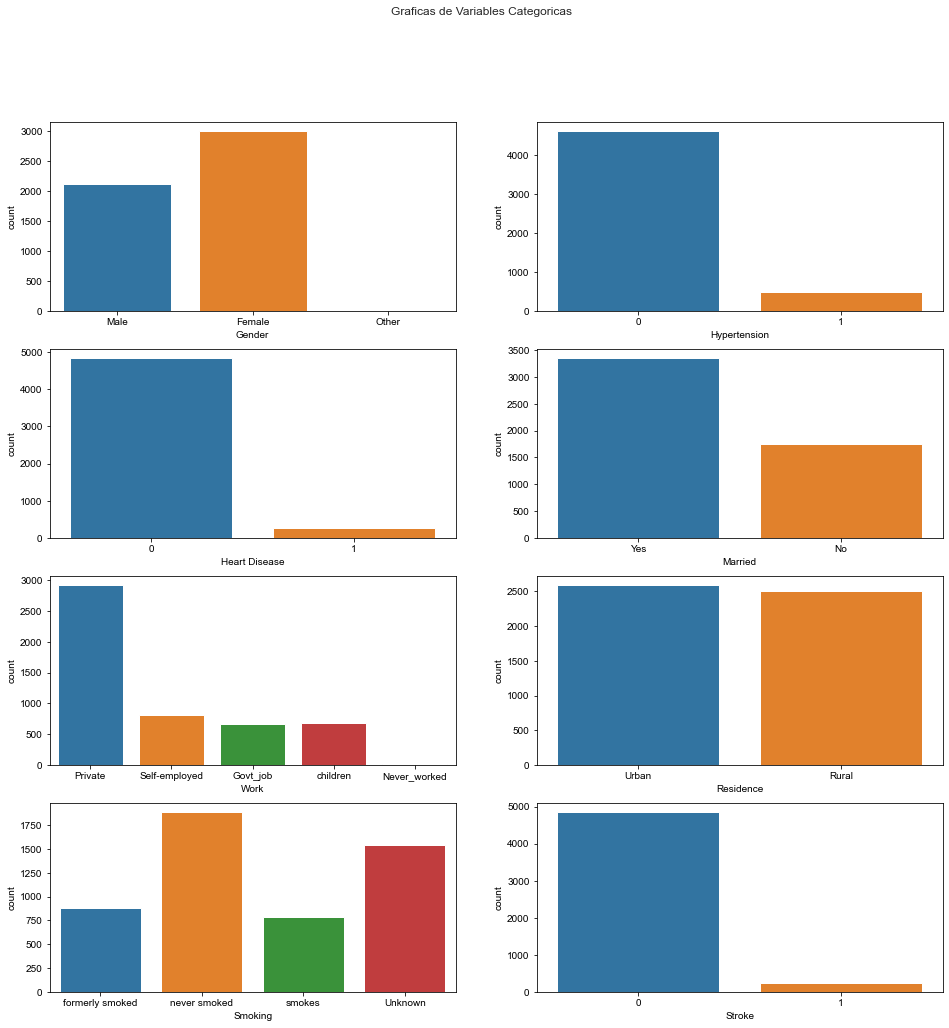

In [20]:
fig,axes = plt.subplots(4,2,figsize = (16,16))
sns.set_style('whitegrid')
fig.suptitle("Graficas de Variables Categoricas")

sns.countplot(ax=axes[0,0],data=predic_df,x='Gender')
sns.countplot(ax=axes[0,1],data=predic_df,x='Hypertension')
sns.countplot(ax=axes[1,0],data=predic_df,x='Heart Disease')
sns.countplot(ax=axes[1,1],data=predic_df,x='Married')
sns.countplot(ax=axes[2,0],data=predic_df,x='Work')
sns.countplot(ax=axes[2,1],data=predic_df,x='Residence')
sns.countplot(ax=axes[3,0],data=predic_df,x='Smoking')
sns.countplot(ax=axes[3,1],data=predic_df,x='Stroke')

plt.show()

**Variables Númericas**

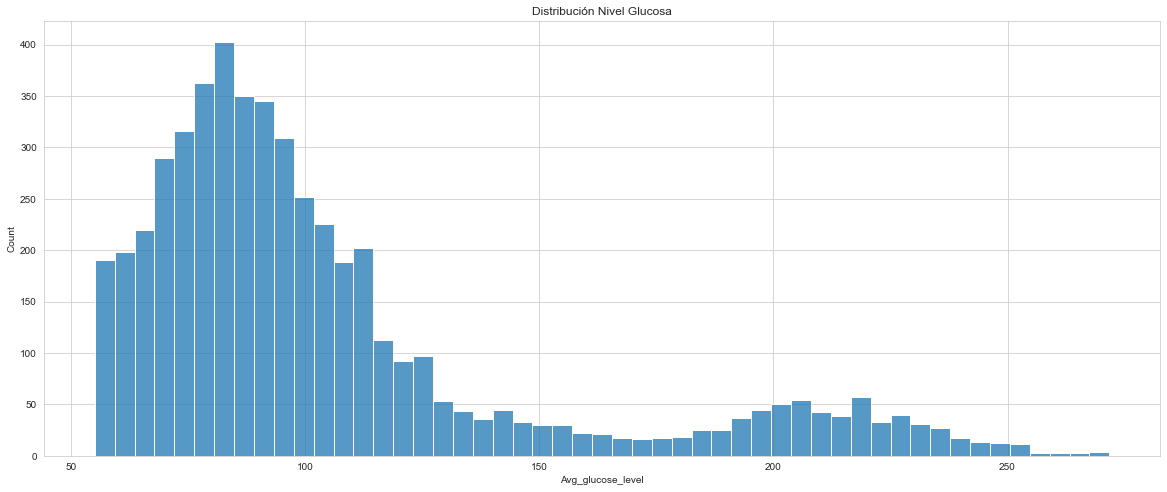

In [21]:
#NIVEL DE GLUCOSA

plt.figure(figsize= (20,8))
sns.histplot(predic_df['Avg_glucose_level'])
plt.title('Distribución Nivel Glucosa')
plt.show()

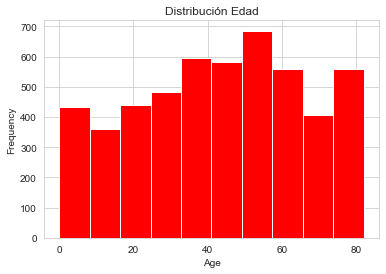

In [22]:
# EDAD
predic_df["Age"].plot.hist(color="red")
plt.title('Distribución Edad')
plt.xlabel("Age");

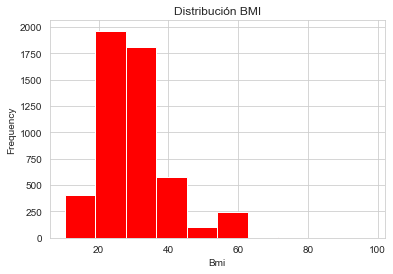

In [23]:
# Let's look at this distribution by ages 
predic_df["Bmi"].plot.hist(color="red")
plt.title('Distribución BMI')
plt.xlabel("Bmi");

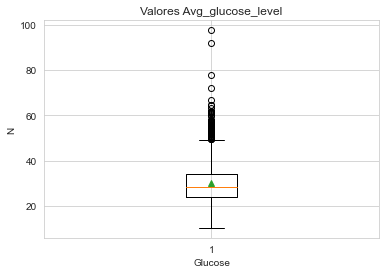

In [24]:
df=predic_df["Bmi"]
plt.boxplot(df, showmeans=True)
plt.title("Valores Avg_glucose_level")
plt.xlabel("Glucose")
plt.ylabel("N")
plt.show()

In [25]:
predic_df.corr()

,Hypertension,Heart Disease,Avg_glucose_level,Bmi,Age,Stroke
Hypertension,1.000000,0.108306,0.174474,0.182844,0.276398,0.127904
Heart Disease,0.108306,1.000000,0.161857,0.091750,0.263796,0.134914
Avg_glucose_level,0.174474,0.161857,1.000000,0.186558,0.238171,0.131945
Bmi,0.182844,0.091750,0.186558,1.000000,0.298651,0.118801
Age,0.276398,0.263796,0.238171,0.298651,1.000000,0.245257
Stroke,0.127904,0.134914,0.131945,0.118801,0.245257,1.000000


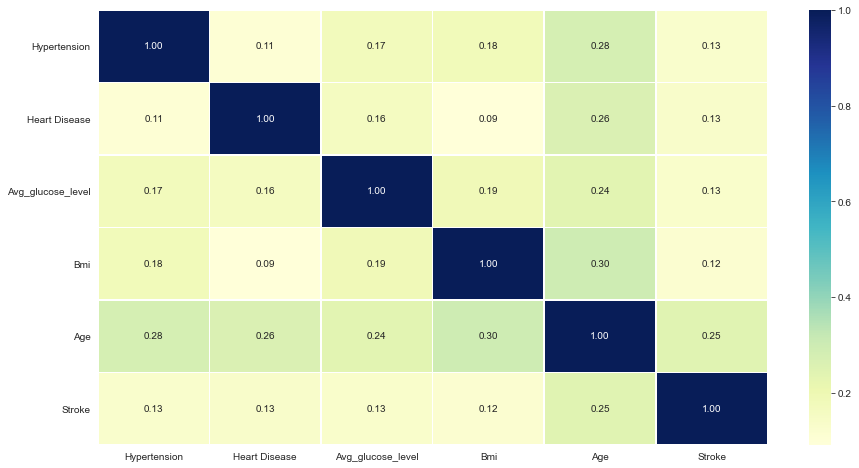

In [26]:
# Let's make the correlation matrix into a heatmap
corr_matrix = predic_df.corr() 
fig, ax = plt.subplots(figsize=(15,8))
ax = sns.heatmap(corr_matrix,
                 annot=True, 
                 linewidths=0.5,
                 fmt=".2f", 
                 cmap="YlGnBu" 
                );

# 3. SET DE ENTRENAMIENTO, VALIDACIÓN Y PRUEBA

In [27]:
df= predic_df
df

,Hypertension,Heart Disease,Married,Work,Residence,Avg_glucose_level,Bmi,Smoking,Gender,Age,Stroke
0,0,1,Yes,Private,Urban,228.69,36.60,formerly smoked,Male,67.0,1
1,0,0,Yes,Self-employed,Rural,202.21,61.46,never smoked,Female,61.0,1
2,0,1,Yes,Private,Rural,105.92,32.50,never smoked,Male,80.0,1
3,0,0,Yes,Private,Urban,171.23,34.40,smokes,Female,49.0,1
4,1,0,Yes,Self-employed,Rural,174.12,24.00,never smoked,Female,79.0,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,1,0,Yes,Private,Urban,83.75,61.46,never smoked,Female,80.0,0
5106,0,0,Yes,Private,Urban,125.20,40.00,never smoked,Female,81.0,0
5107,0,0,Yes,Self-employed,Rural,82.99,30.60,never smoked,Female,35.0,0
5108,0,0,Yes,Private,Rural,166.29,25.60,formerly smoked,Male,51.0,0


In [28]:
df =df.join(pd.get_dummies(df['Gender']))
df.drop(columns=['Gender'], inplace=True)
df.rename(columns={'Female': 'female', 'Male': 'male'}, inplace=True)

df = df.join(pd.get_dummies(df['Work']))
df.drop(columns=['Work'], inplace=True)
df.rename(columns={
    'Private': 'private_work',
    'Self-employed': 'self_employed',
    'Govt_job': 'government_work',
    'Children': 'children_',
    'Never_worked': 'never_worked'
}, inplace=True)

df = df.join(pd.get_dummies(df['Residence']))
df.drop(columns=['Residence'], inplace=True)
df.rename(columns={'Urban': 'urban_resident',
          'Rural': 'rural_resident'}, inplace=True)

df = df.join(pd.get_dummies(df['Smoking']))
df.drop(columns=['Smoking'], inplace=True)
df.rename(columns={
    'formerly smoked': 'formerly_smoked',
    'never smoked': 'never_smoked',
    'Unknown': 'smoking_unknown',
    "smokes":"smokes"
}, inplace=True)

df['Married'].replace(['Yes', 'No'], [1, 0], inplace=True)
df['Married'].dtype

df.head().T

,0,1,2,3,4
Hypertension,0.00,0.00,0.00,0.00,1.00
Heart Disease,1.00,0.00,1.00,0.00,0.00
Married,1.00,1.00,1.00,1.00,1.00
Avg_glucose_level,228.69,202.21,105.92,171.23,174.12
Bmi,36.60,61.46,32.50,34.40,24.00
Age,67.00,61.00,80.00,49.00,79.00
Stroke,1.00,1.00,1.00,1.00,1.00
female,0.00,1.00,0.00,1.00,1.00
male,1.00,0.00,1.00,0.00,0.00
Other,0.00,0.00,0.00,0.00,0.00


In [29]:
df

,Hypertension,Heart Disease,Married,Avg_glucose_level,Bmi,Age,Stroke,female,male,Other,...,never_worked,private_work,self_employed,children,rural_resident,urban_resident,smoking_unknown,formerly_smoked,never_smoked,smokes
0,0,1,1,228.69,36.60,67.0,1,0,1,0,...,0,1,0,0,0,1,0,1,0,0
1,0,0,1,202.21,61.46,61.0,1,1,0,0,...,0,0,1,0,1,0,0,0,1,0
2,0,1,1,105.92,32.50,80.0,1,0,1,0,...,0,1,0,0,1,0,0,0,1,0
3,0,0,1,171.23,34.40,49.0,1,1,0,0,...,0,1,0,0,0,1,0,0,0,1
4,1,0,1,174.12,24.00,79.0,1,1,0,0,...,0,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,1,0,1,83.75,61.46,80.0,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0
5106,0,0,1,125.20,40.00,81.0,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0
5107,0,0,1,82.99,30.60,35.0,0,1,0,0,...,0,0,1,0,1,0,0,0,1,0
5108,0,0,1,166.29,25.60,51.0,0,0,1,0,...,0,1,0,0,1,0,0,1,0,0


In [30]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Hypertension       5110 non-null   int64  
 1   Heart Disease      5110 non-null   int64  
 2   Married            5110 non-null   int64  
 3   Avg_glucose_level  5110 non-null   float64
 4   Bmi                5110 non-null   float64
 5   Age                5110 non-null   float64
 6   Stroke             5110 non-null   int64  
 7   female             5110 non-null   uint8  
 8   male               5110 non-null   uint8  
 9   Other              5110 non-null   uint8  
 10  government_work    5110 non-null   uint8  
 11  never_worked       5110 non-null   uint8  
 12  private_work       5110 non-null   uint8  
 13  self_employed      5110 non-null   uint8  
 14  children           5110 non-null   uint8  
 15  rural_resident     5110 non-null   uint8  
 16  urban_resident     5110 

In [31]:
X =df.drop(columns=['Stroke'])
y = df["Stroke"]
X.shape, y.shape

((5110, 20), (5110,))

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=10)

NameError: name 'X_resampled' is not defined

In [ ]:
model_names = []
model_scores = []

In [ ]:
def confusion_matrix_plot(matrix, model_name):
  """
  Plots the confusion matrix of a model as a heatmap.
  """
  _, ax = plt.subplots(figsize=(5, 3))
  plt.title(f'{model_name} Confusion Matrix')
  sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues')
  ax.set_xticklabels(['Postitive', 'Negative'])
  ax.set_yticklabels(['Postitive', 'Negative'])
  ax.set_ylabel('Predicted Values')
  ax.set_xlabel('Actual Values')
  ax.xaxis.tick_top()
  ax.xaxis.set_label_position('top')

# 5. ALGORITMOS

**5.1 RANDON FOREST ENSAMBLE**

In [33]:
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTENC
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.datasets import make_classification
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report



In [34]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
rf = RandomForestClassifier(random_state=10)
rf.fit(X_train, y_train)

NameError: name 'X_train' is not defined

In [35]:
from sklearn.neighbors import KNeighborsClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train,y_train)
pred = rf.predict(X_test)

print(f"F1 socre: {round(metrics.f1_score(y_test, pred), 3)}")
print(f"Accuracy socre: {round(metrics.accuracy_score(y_test, pred), 4)}")
print('\n')
print(f"Confusion Matrix:\n{confusion_matrix(y_test,pred)}")
print('\n')
print(f"Classification Report:\n{classification_report(y_test,pred)}")

NameError: name 'X_train' is not defined

In [36]:
confusion_matrix_plot(confusion_matrix(y_test, rf.predict(X_test)), 'Random Forest')

NameError: name 'confusion_matrix_plot' is not defined

In [37]:
#1 owner positivo
#0 no owner negativo
VN=1419
FP=56
FN=76
VP=1366

EX=(VP+VN)/(VP+VN+FN+FP)
PR=VP/(VP+FP)
SE=VP/(VP+FN)
ES=VN/(VN+FP)

print("exactitud: ",EX)
print("precision: ",PR)
print("sensibilidad: ",SE)
print("especificidad: ",ES)

exactitud:  0.954748028796709
precision:  0.960618846694796
sensibilidad:  0.9472954230235784
especificidad:  0.9620338983050848


**KGBOOST NUEVO ALGORITMO**

In [38]:
xgb = XGBClassifier(random_state=10)
xgb.fit(X_train, y_train)

NameError: name 'X_train' is not defined

In [39]:
print(classification_report(y_test, xgb.predict(X_test)))

NameError: name 'y_test' is not defined

In [40]:
confusion_matrix_plot(confusion_matrix(y_test, xgb.predict(X_test)), 'XGBoost')

NameError: name 'confusion_matrix_plot' is not defined

In [413]:
#1 owner positivo
#0 no owner negativo
VN=1415
FP=60
FN=69
VP=1373

EX=(VP+VN)/(VP+VN+FN+FP)
PR=VP/(VP+FP)
SE=VP/(VP+FN)
ES=VN/(VN+FP)

print("exactitud: ",EX)
print("precision: ",PR)
print("sensibilidad: ",SE)
print("especificidad: ",ES)

exactitud:  0.9557764826876929
precision:  0.9581297976273552
sensibilidad:  0.9521497919556172
especificidad:  0.9593220338983051


**DESICION TREE**

In [414]:
dt = DecisionTreeClassifier(random_state=10)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=10)

In [415]:
print(classification_report(y_test, dt.predict(X_test)))

              precision    recall  f1-score   support

           0       0.93      0.92      0.93      1475
           1       0.92      0.93      0.92      1442

    accuracy                           0.93      2917
   macro avg       0.93      0.93      0.93      2917
weighted avg       0.93      0.93      0.93      2917



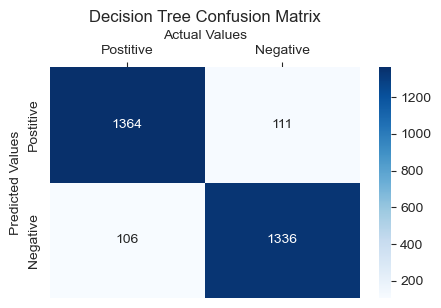

In [416]:
confusion_matrix_plot(confusion_matrix(y_test, dt.predict(X_test)), 'Decision Tree')

In [417]:
#1 owner positivo
#0 no owner negativo
VN=1364
FP=111
FN=106
VP=1336

EX=(VP+VN)/(VP+VN+FN+FP)
PR=VP/(VP+FP)
SE=VP/(VP+FN)
ES=VN/(VN+FP)

print("exactitud: ",EX)
print("precision: ",PR)
print("sensibilidad: ",SE)
print("especificidad: ",ES)

exactitud:  0.9256085018854988
precision:  0.9232895646164478
sensibilidad:  0.926490984743412
especificidad:  0.9247457627118644


**LOGISTIC REGRESSION**

In [418]:
lr = LogisticRegression(max_iter=1000, random_state=10)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=10)

In [419]:
print(classification_report(y_test, lr.predict(X_test)))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87      1475
           1       0.88      0.86      0.87      1442

    accuracy                           0.87      2917
   macro avg       0.87      0.87      0.87      2917
weighted avg       0.87      0.87      0.87      2917



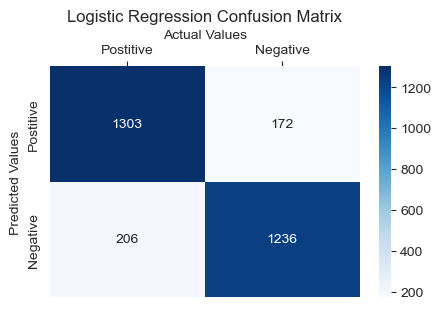

In [420]:
confusion_matrix_plot(confusion_matrix(y_test, lr.predict(X_test)), 'Logistic Regression')

In [421]:
#1 owner positivo
#0 no owner negativo
VN=1303
FP=172
FN=206
VP=1236
EX=(VP+VN)/(VP+VN+FN+FP)
PR=VP/(VP+FP)
SE=VP/(VP+FN)
ES=VN/(VN+FP)

print("exactitud: ",EX)
print("precision: ",PR)
print("sensibilidad: ",SE)
print("especificidad: ",ES)

exactitud:  0.8704148097360301
precision:  0.8778409090909091
sensibilidad:  0.8571428571428571
especificidad:  0.8833898305084745


# 6.4 RANDON FOREST VARIABLES MAS IMPORTANTES


In [426]:
import numpy as np
from xgboost import XGBRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import RandomizedSearchCV
from sklearn.feature_selection import RFECV
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import make_scorer

In [498]:
xgb = XGBRegressor()
xgb.fit(X_train, y_train)
imp = pd.DataFrame(xgb.feature_importances_ ,columns = ['Importance'],index = X_train.columns)
imp = imp.sort_values(['Importance'], ascending = False)

print(imp)

C:\Users\luisc\anaconda3\lib\site-packages\xgboost\data.py:208: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


                   Importance
government_work      0.198389
Age                  0.139825
smokes               0.104237
self_employed        0.101813
formerly_smoked      0.081821
never_smoked         0.075065
smoking_unknown      0.062505
private_work         0.040537
rural_resident       0.036726
female               0.033968
Avg_glucose_level    0.028605
Heart Disease        0.027932
Bmi                  0.027219
Married              0.025175
Hypertension         0.016184
urban_resident       0.000000
children             0.000000
Other                0.000000
male                 0.000000
never_worked         0.000000


In [499]:
# Define la funcion para calcular el RMSE
def rmse(y_true, y_pred):
    return np.sqrt(np.mean((y_true-y_pred)**2))

# Define a las caracteristicas importantes segun el RMSE (as a score)
def nrmse(y_true, y_pred):
    return -1.0*rmse(y_true, y_pred)

neg_rmse = make_scorer(nrmse)

estimator = XGBRegressor()
selector = RFECV(estimator, cv = 3, n_jobs = -1, scoring = neg_rmse)
selector = selector.fit(X_train, y_train)

print("The number of selected features is: {}".format(selector.n_features_))

features_kept = X_train.columns.values[selector.support_] 
X_train = X_train[features_kept]
X_test = X_test[features_kept]

The number of selected features is: 14


In [500]:
# Estas son las caracteristicas seleccionadas 
features_kept

array(['Heart Disease', 'Married', 'Avg_glucose_level', 'Bmi', 'Age',
       'female', 'government_work', 'private_work', 'self_employed',
       'rural_resident', 'smoking_unknown', 'formerly_smoked',
       'never_smoked', 'smokes'], dtype=object)